In [2]:
import yfinance as yf
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


In [15]:
class Emabacktester():
  def __init__(self,ticker,start,end,EMA_S,EMA_L):
    self.ticker=ticker
    self.start=start
    self.end=end
    self.EMA_S=EMA_S
    self.EMA_L=EMA_L
    self.results = None
    self.getdata()

  def getdata(self):
    data = yf.download(self.ticker,start=self.start,end = self.end)
    data.columns = data.columns.droplevel("Ticker")
    data = data["Close"].to_frame()
    data["returns"] = np.log(data["Close"].div(data["Close"].shift(1)))
    data["EMA_S"] = data["Close"].ewm(span=self.EMA_S,min_periods=self.EMA_S).mean()
    data["EMA_L"] = data["Close"].ewm(span=self.EMA_L,min_periods=self.EMA_L).mean()
    data.dropna(inplace=True)
    self.data = data
    return data

  def test_strategy(self):
    data = self.data.copy().dropna()
    data["position"] = np.where(data["EMA_S"] > data["EMA_L"],1,-1)
    data["strategy"] = data["returns"]*data["position"].shift(1)
    data.dropna(inplace=True)
    data["returnsbh"] = data["returns"].cumsum().apply(np.exp)
    data["returnsstrategy"] = data["strategy"].cumsum().apply(np.exp)
    self.results = data
    perf = data["returnsstrategy"].iloc[-1]
    outperf = perf-data["returnsbh"].iloc[-1]
    return round(perf,6) , round(outperf,6)

  def plot_results(self):
    if self.results is None:
      print("Run test_strategy first")

    else:
      title = "{} | EMA_S = {} | EMA_L = {}".format(self.ticker,self.EMA_S,self.EMA_L)
      self.results[["returnsbh","returnsstrategy"]].plot(title=title,figsize=(12,8))



In [48]:
tester = Emabacktester("ADANIENT.NS","2020-01-01","2025-01-01",3,20)

[*********************100%***********************]  1 of 1 completed


In [49]:
tester.test_strategy()

(np.float64(18.763761), np.float64(7.656749))

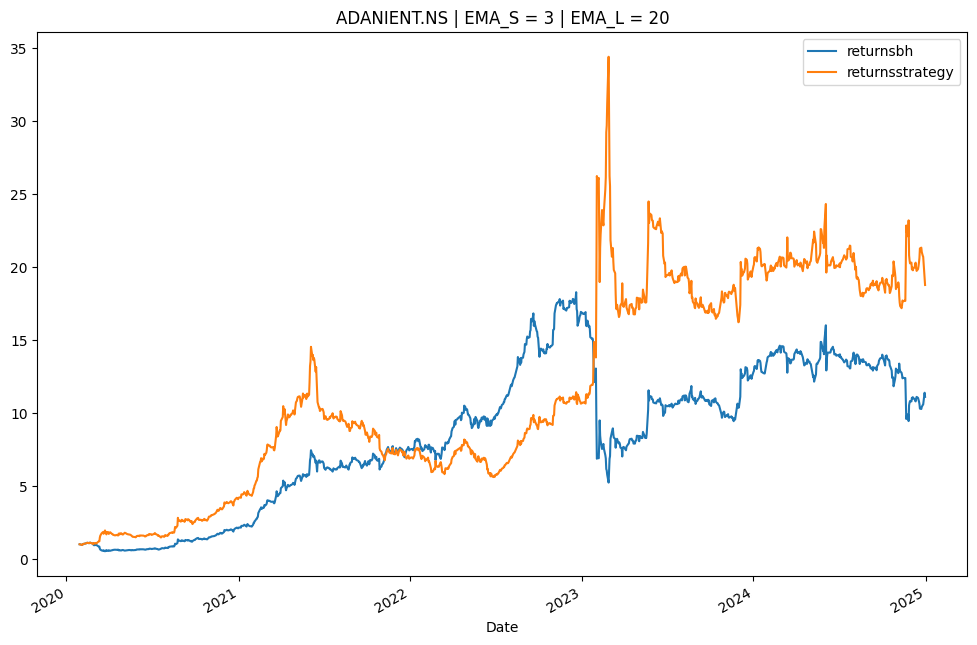

In [50]:
tester.plot_results()